In [1]:
from pandas import DataFrame
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import plotly.graph_objects as go
import urllib.parse
from urllib.parse import urljoin
import re
from wordcloud import WordCloud
from PIL import Image
import warnings
warnings.filterwarnings("ignore")



In [2]:
pd.set_option('precision', 0) 
df = pd.read_csv('CleanWildlife.csv', '\t', index_col=0) # read csv file

In [3]:
df.head(10)

Scientific Name                   Common Name  Region  \
0                Abies fraseri                    Fraser fir  NC, VA   
1          Ablautus schlingeri          Oso Flaco robber fly      CA   
2               Abronia alpina  Ramshaw Meadows sand-verbena      CA   
3            Abronia ammophila      Yellowstone Sand Verbena     NaN   
4       Abronia ammophila var.                           NaN     NaN   
5             Abronia ammphila                  sand-verbena      WY   
6            Abronia bigelovii                  sand-verbena      NM   
7           Abronia macrocarpa    Large-fruited sand-verbena      TX   
8            Abronia turbinata                  sand-verbena      NV   
9  Abronia umbellata acutalata      Rose-purple sand-verbena      WA   

          Family  First Listed      Taxonomic Group      Status Type  
0       pinaceae           NaN  Conifers and Cycads  Not Listed    P  
1       asilidae           NaN              Insects  Not Listed    I  
2  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
3  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
4  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
5  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
6  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
7  nyctaginaceae          1988     Flowering Plants  Endangered    P  
8  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
9  nyctaginaceae           NaN     Flowering Plants  Not Listed    P

In [4]:
def count(data): 
    
    """
      Function to count the number of species in each state in the United States
          data: dataframe that will be used to count 
          In the next parts, we will analyze 3 dataframes: all species, animals and plants
      The function return a dataframe with two columns: state codes and number of species
  
    """
    
    split_char = ","
    state = [] #empty list to store states

    for i in range (0,len(data)):
        words = data.ix[i,"Region"] #get state codes
        try:
            temp = words.split(split_char) #try to split the string by "," each element in temp is a state code
            for item in temp:
                item = item.replace(" ","") #remove whitespace
                state.append(item) #save the state codes into the empty list we created above
        except:  #if we cannot split, the region is NaN so we pass it
            pass 
    
    codelist = pd.Series(state).drop_duplicates().tolist() #get a list of state codes in our dataframe

    count = []
    for item in codelist:
        count.append(state.count(item)) #count the number of species in each state

    #combine state code and counts of species into a dataframe
    state_count = pd.concat((pd.DataFrame(codelist).T, pd.DataFrame(count).T)).T 
    state_count.columns = ("Code","No. of Species") #colnames

    return state_count
    

In [5]:
#Now, lets have a visualization at the species distribution by U.S states
#I learned the codes below from plotly

state_all = count(df) #count function return all the counts of species in U.S states

fig = go.Figure(data=go.Choropleth(
    locations=state_all["Code"], 
    z = state_all["No. of Species"].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'portland',
    colorbar_title = "Number of Species",
    marker_line_color = "white"
))

fig.update_layout(
    title_text = "United States Species Distribution",
    geo_scope='usa')
fig.show()

In [6]:
#Invertebrate Animal
df_Ianimal = df.loc[df["Type"] == "I"] #subset of animals (type: invertebrate or vertebrate)
df_Ianimal.index = range(len(df_Ianimal)) #rearrange index
state_Ianimal = count(df_Ianimal) #count for number of invertebrate animal species in each state

#Vertebrate Animal
df_Vanimal = df.loc[df["Type"] == "V"] 
df_Vanimal.index = range(len(df_Vanimal)) 
state_Vanimal = count(df_Vanimal) 

df_animal = pd.concat((df_Vanimal, df_Ianimal)) #all animal species
df_animal.index = range(len(df_animal))

#Plant
df_plant = df.loc[df["Type"] == "P"] #subset of plants (type: plant)
df_plant.index = range(len(df_plant)) #rearrange index
state_plant = count(df_plant) #count for number of plant species in each state

In [7]:
fig = go.Figure(data=go.Choropleth(
    locations=state_Ianimal["Code"], 
    z = state_Ianimal["No. of Species"].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'blues',
    colorbar_title = "Number of Species",
    marker_line_color = "white"
))

fig.update_layout(
    title_text = "United States Invertebrate Animal Species Distribution",
    geo_scope='usa')
fig.show()

In [8]:
fig = go.Figure(data=go.Choropleth(
    locations=state_Vanimal["Code"], 
    z = state_Vanimal["No. of Species"].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'oryel',
    colorbar_title = "Number of Species",
    marker_line_color = "white"
))

fig.update_layout(
    title_text = "United States Vertebrate Animal Species Distribution",
    geo_scope='usa')
fig.show()

In [9]:
fig = go.Figure(data=go.Choropleth(
    locations=state_plant["Code"], 
    z = state_plant["No. of Species"].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'darkmint',
    colorbar_title = "Number of Species",
    marker_line_color = "white"
))

fig.update_layout(
    title_text = "United States Plant Species Distribution",
    geo_scope='usa')
fig.show()

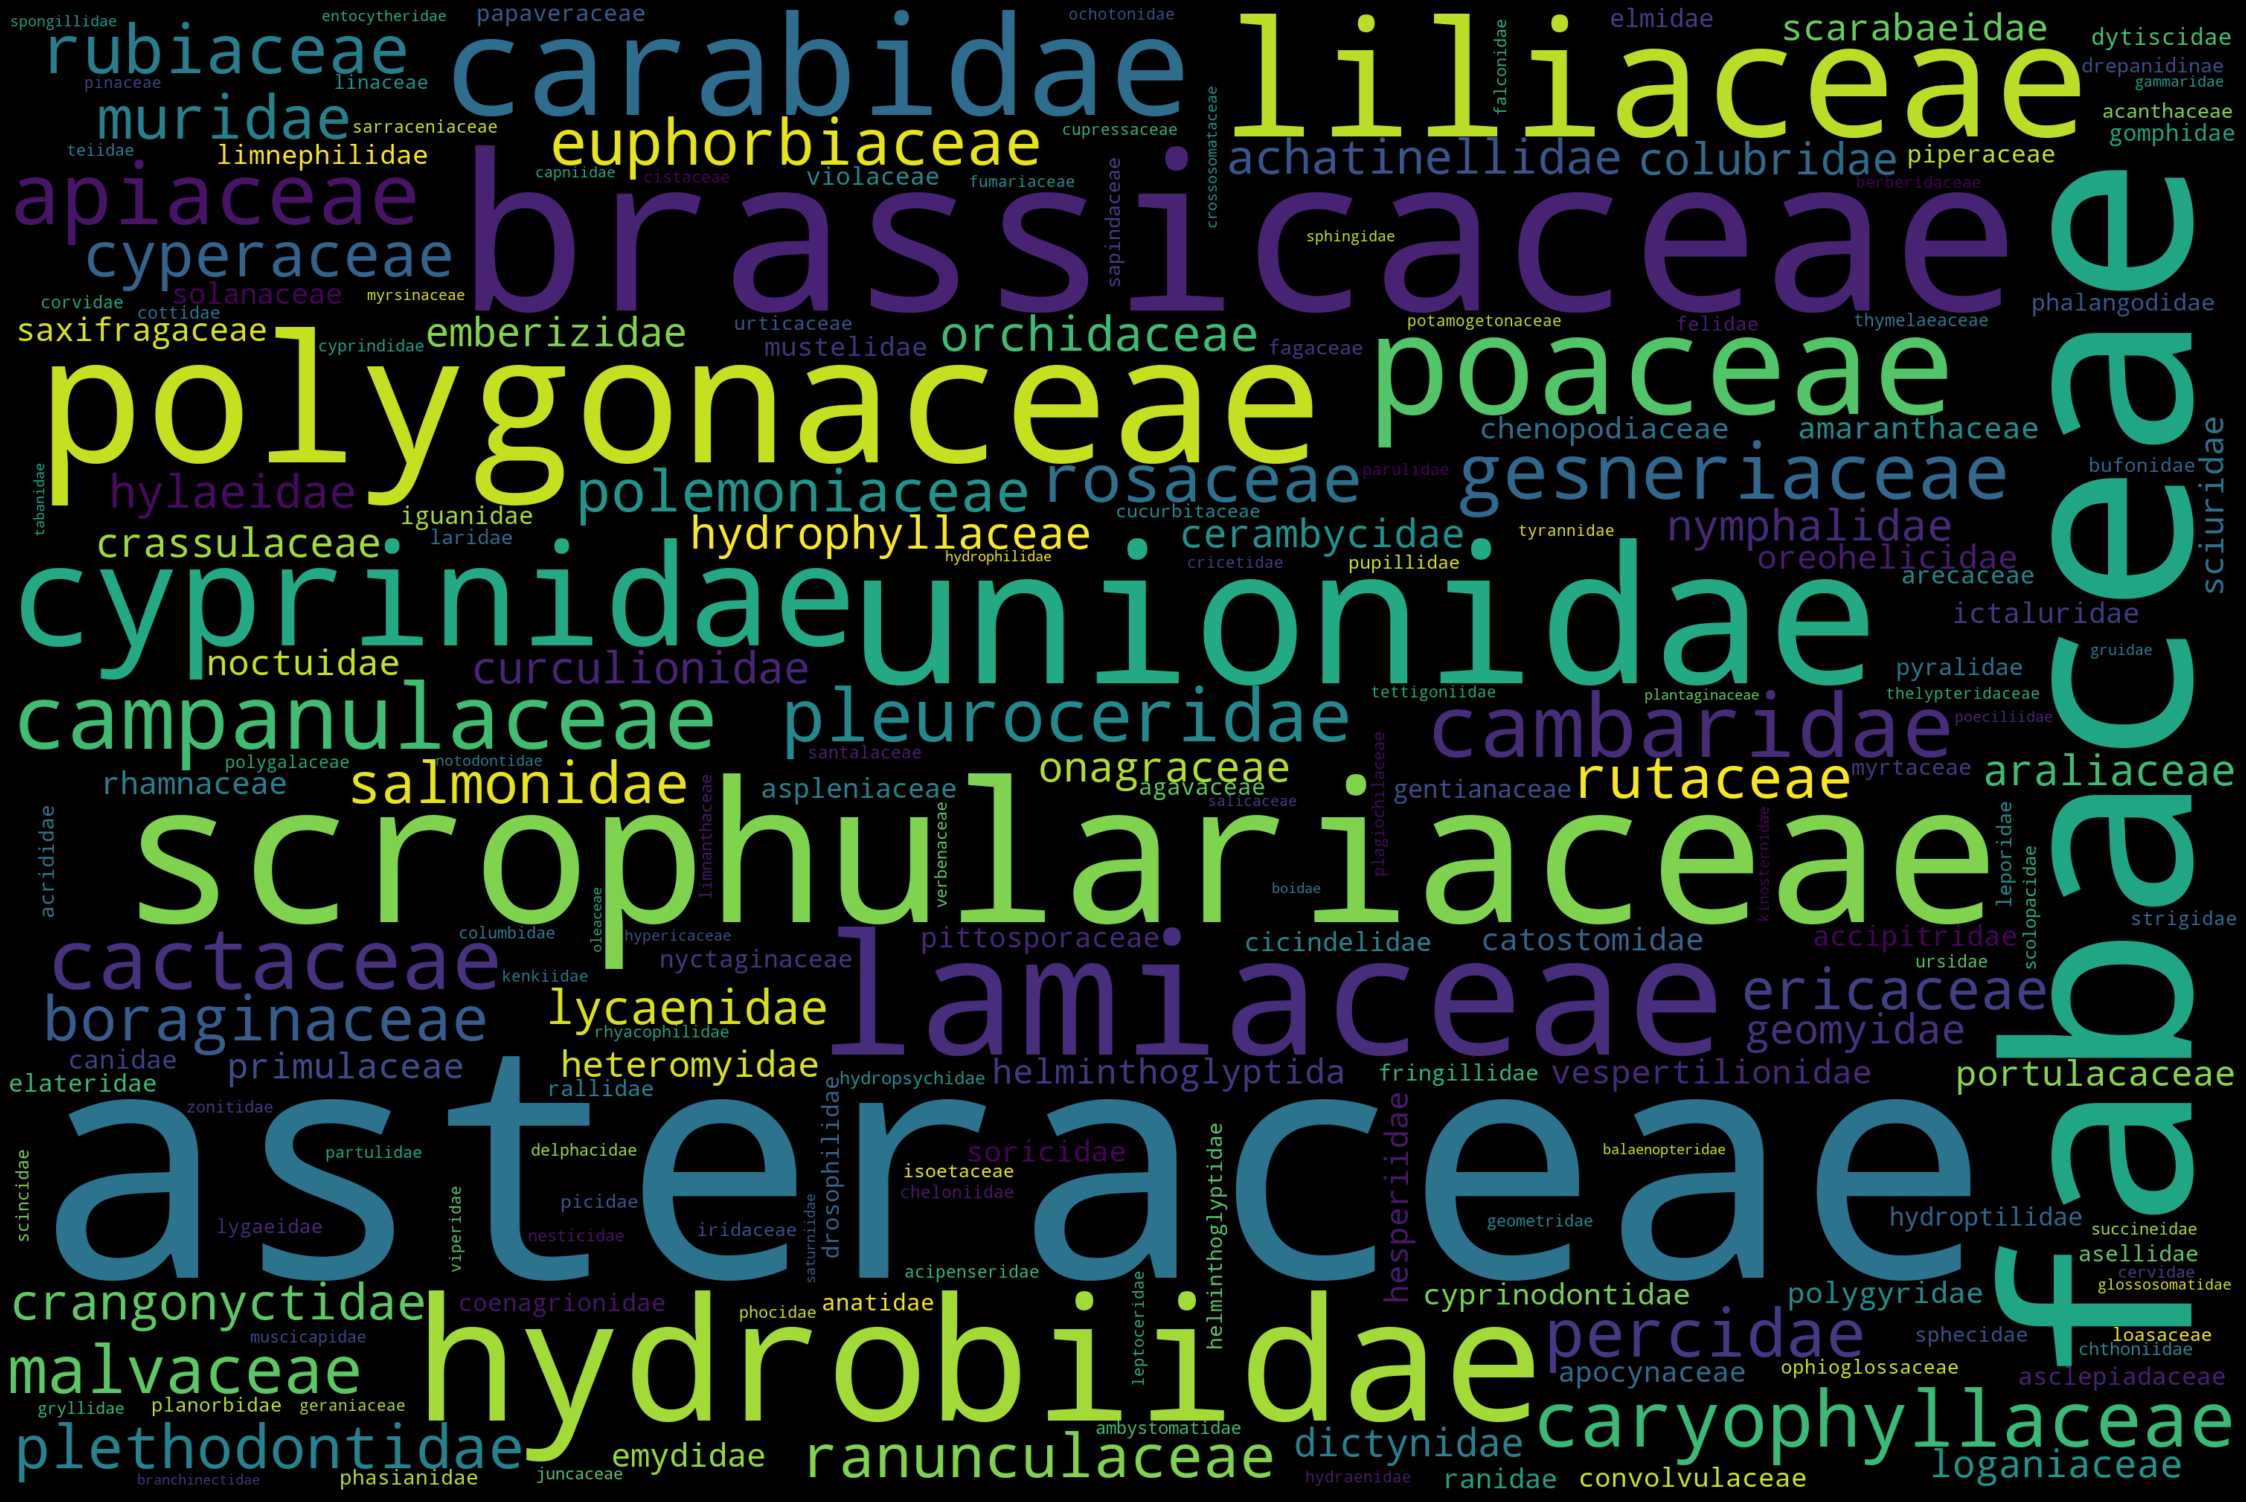

In [10]:
#retrieve all the words in column Family and save into string
string = " ".join(fname for fname in df.Family)

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, width=3000, height=2000)
wordcloud.generate(string)

# Display the generated image
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
    

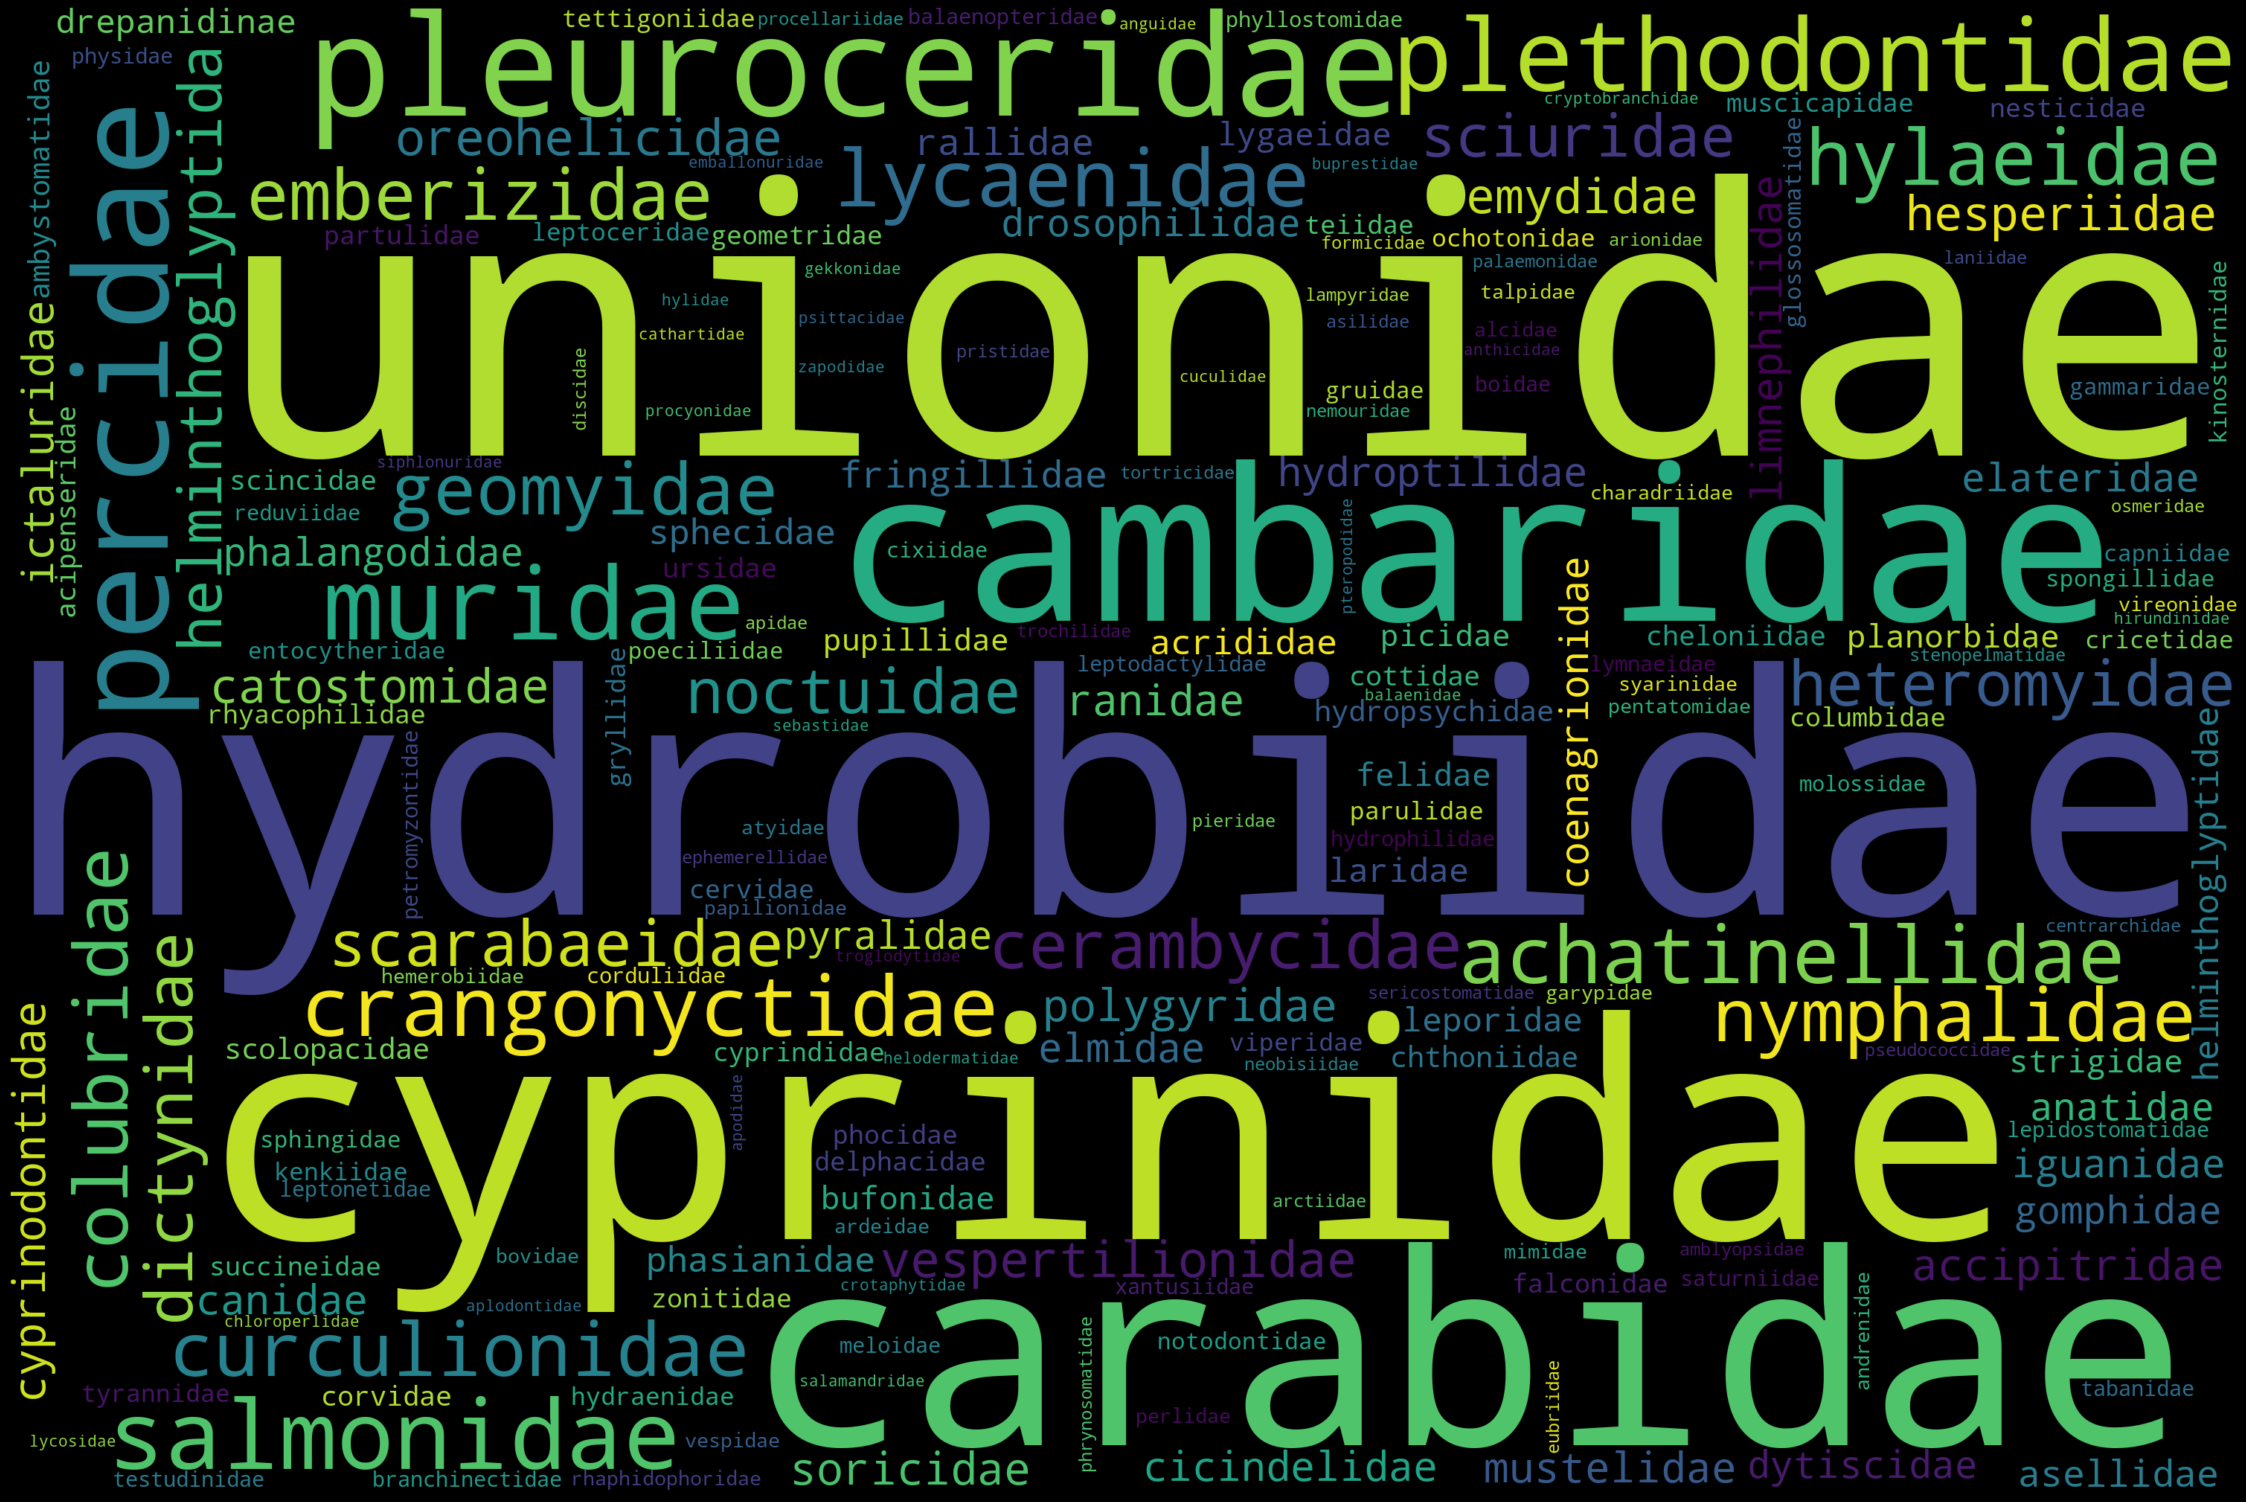

In [11]:
string = " ".join(fname for fname in df_animal.Family)

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, width=3000, height=2000)
wordcloud.generate(string)

# Display the generated image
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
    

In [12]:
group = df.groupby("Taxonomic Group").size()
group.sort_values(ascending = True, inplace = True)
count_group = pd.DataFrame({"Group":group.index, "Count":group.values})


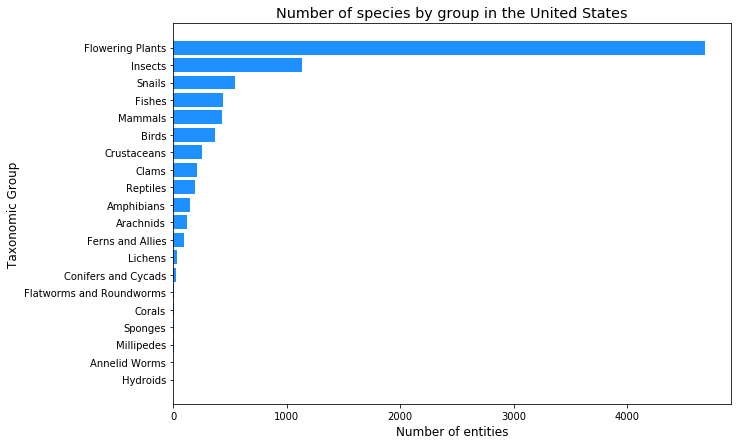

In [13]:
plt.figure(figsize=(10,7))
plt.barh(y=count_group.Group, width=count_group.Count, color ="dodgerblue")
plt.title('Number of species by group in the United States', fontsize ='x-large')
plt.ylabel('Taxonomic Group', fontsize ='large')
plt.xlabel('Number of entities', fontsize='large')
plt.show()

In [14]:
df_listed = df[df.Status != "Not Listed"]
status = df.groupby("Status").size()
status.sort_values(ascending = True, inplace = True)
count_status = pd.DataFrame({"Status":status.index, "Count":status.values})


In [15]:
size = status*100/status.values.sum()
labels = count_status["Status"].tolist()

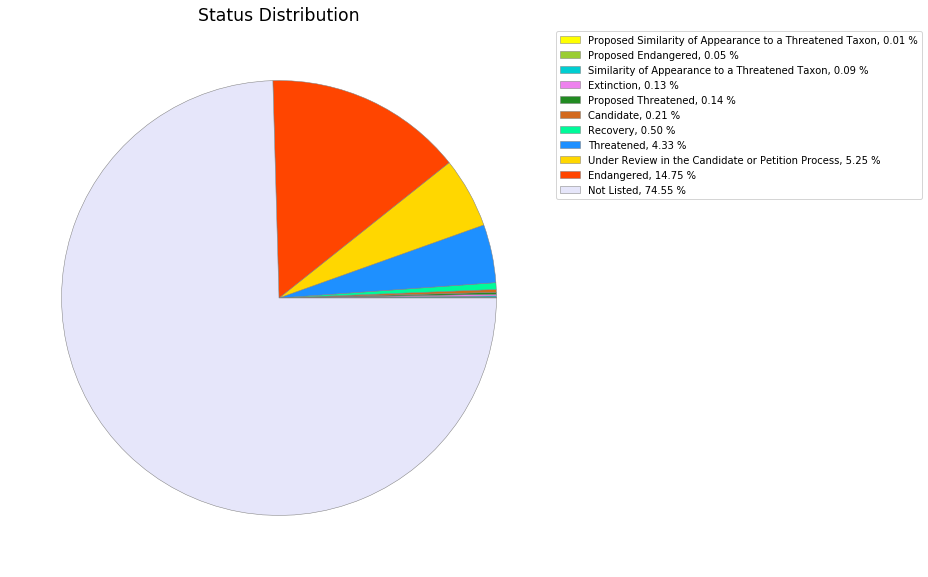

In [16]:
colors = ['yellow','yellowgreen','darkturquoise','violet','forestgreen',
          'chocolate','mediumspringgreen','dodgerblue','gold','orangered','lavender']
          
status.plot.pie(shadow = False, labels = None, radius = 1, colors=colors,
                wedgeprops={"edgecolor":"gray",'linewidth': 0.5, 'antialiased': True}, figsize = (10,10))

plt.title('Status Distribution', fontsize = 'xx-large')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor = (1,1), loc = 'best', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(labels, size)])
plt.show()


In [17]:
df.head(10)

Scientific Name                   Common Name  Region  \
0                Abies fraseri                    Fraser fir  NC, VA   
1          Ablautus schlingeri          Oso Flaco robber fly      CA   
2               Abronia alpina  Ramshaw Meadows sand-verbena      CA   
3            Abronia ammophila      Yellowstone Sand Verbena     NaN   
4       Abronia ammophila var.                           NaN     NaN   
5             Abronia ammphila                  sand-verbena      WY   
6            Abronia bigelovii                  sand-verbena      NM   
7           Abronia macrocarpa    Large-fruited sand-verbena      TX   
8            Abronia turbinata                  sand-verbena      NV   
9  Abronia umbellata acutalata      Rose-purple sand-verbena      WA   

          Family  First Listed      Taxonomic Group      Status Type  
0       pinaceae           NaN  Conifers and Cycads  Not Listed    P  
1       asilidae           NaN              Insects  Not Listed    I  
2  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
3  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
4  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
5  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
6  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
7  nyctaginaceae          1988     Flowering Plants  Endangered    P  
8  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
9  nyctaginaceae           NaN     Flowering Plants  Not Listed    P

In [18]:
date = df.groupby("First Listed").size()
year =[]
for i in range(1970,2025,5):
    year.append(i)
year = df["First Listed"].drop_duplicates().dropna()
year = year.tolist()



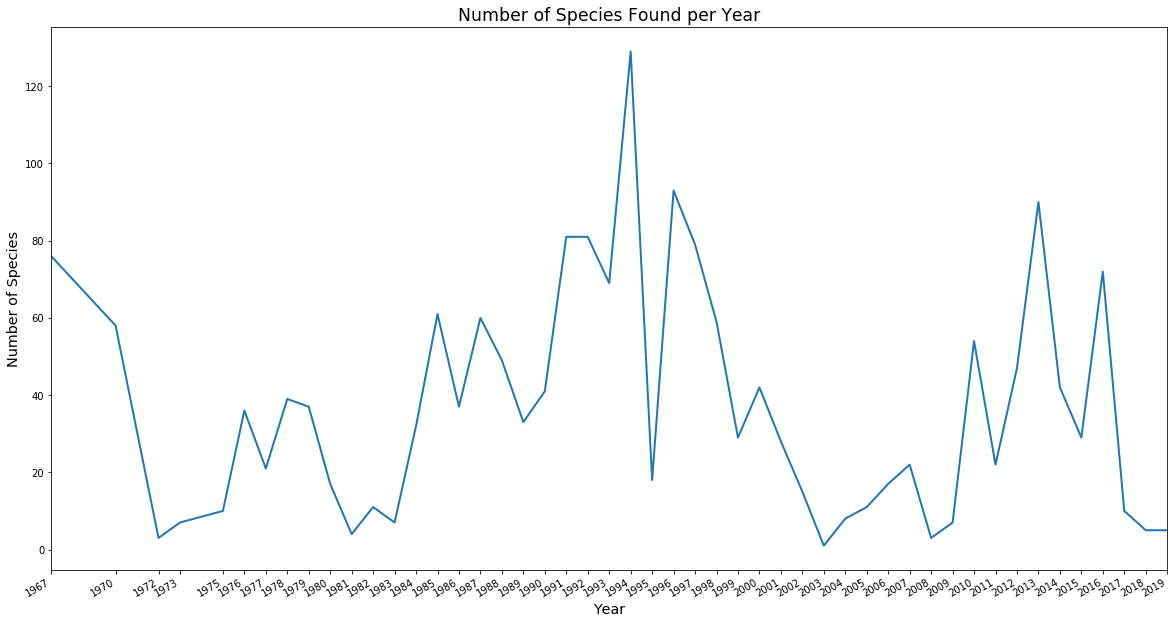

In [19]:
plt.figure(figsize=(20,10))
date.plot(linewidth = 2)
plt.xticks(year, rotation = 30, ha = 'right')
plt.title('Number of Species Found per Year', fontsize ='xx-large')
plt.xlabel('Year', fontsize ='x-large')
plt.ylabel('Number of Species', fontsize ='x-large')
plt.show()

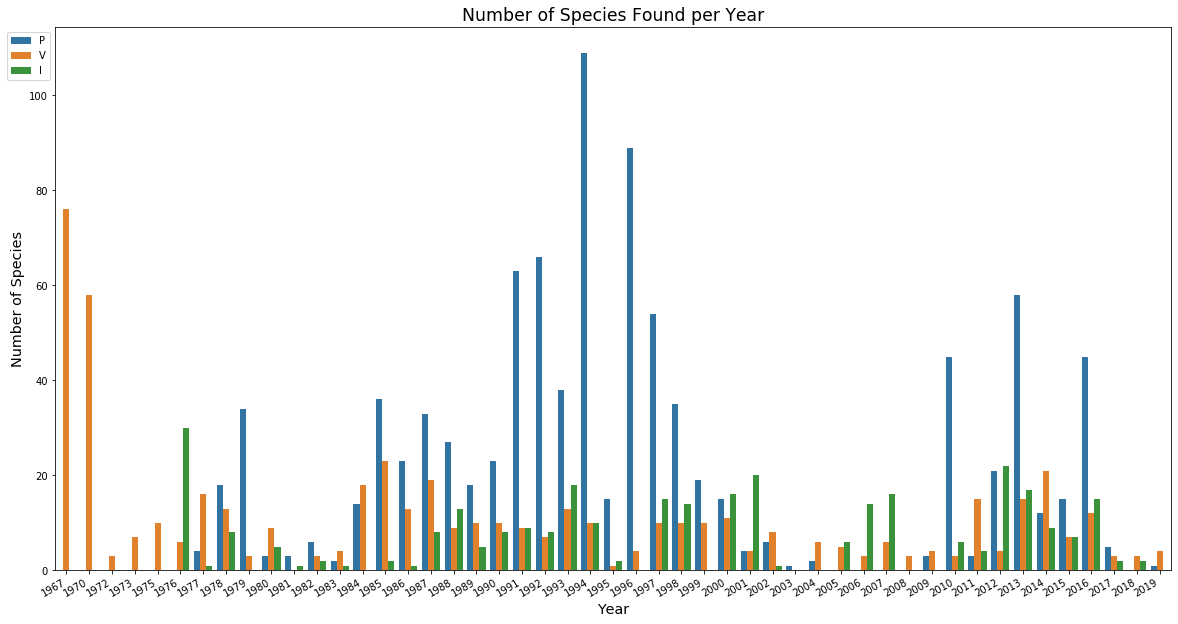

In [20]:
df_date = df[df["First Listed"].notnull()]
df_date["First Listed"] = df_date["First Listed"].astype(int)
plt.figure(figsize=(20,10))
sns.countplot(x='First Listed',  hue='Type', data=df_date)
plt.xticks(rotation = 30, ha = 'right')
plt.title('Number of Species Found per Year', fontsize ='xx-large')
plt.xlabel('Year', fontsize ='x-large')
plt.ylabel('Number of Species', fontsize ='x-large')
plt.legend(bbox_to_anchor = (0,1))


In [23]:
df_en = df_date[(df_date.Status == "Endangered") | (df_date.Status == "Threatened")]

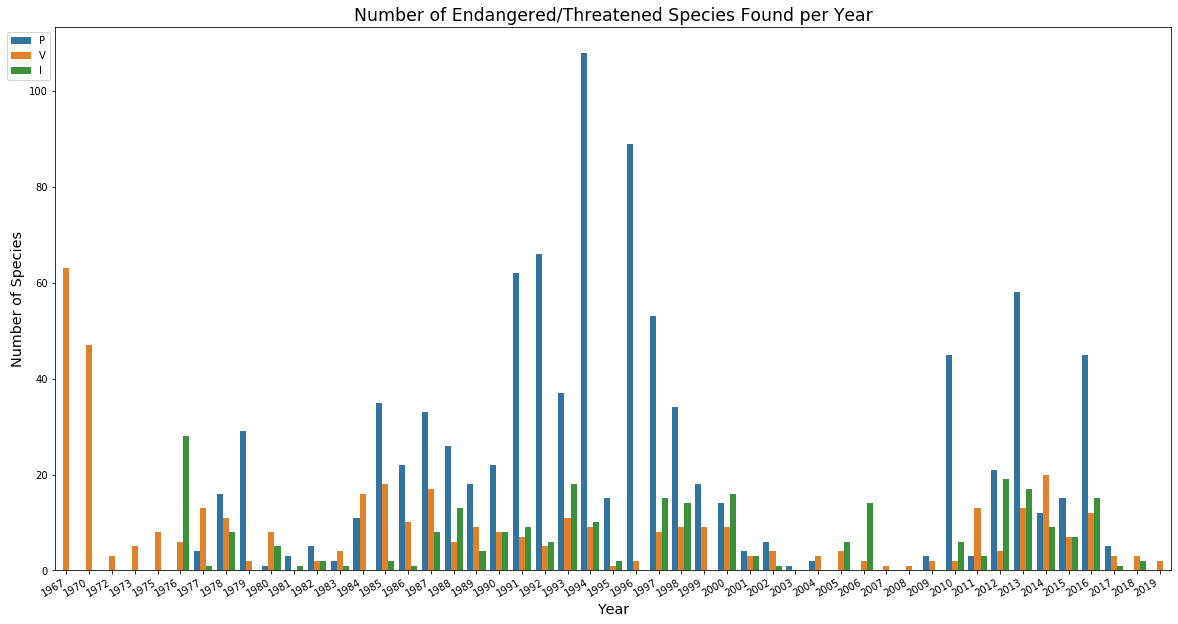

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='First Listed',  hue='Type', data=df_en)
plt.xticks(rotation = 30, ha = 'right')
plt.title('Number of Endangered/Threatened Species Found per Year', fontsize ='xx-large')
plt.xlabel('Year', fontsize ='x-large')
plt.ylabel('Number of Species', fontsize ='x-large')
plt.legend(bbox_to_anchor = (0,1))

In [25]:
len(df_date) - len(df_en)

164